In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import csv
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dir = 'C:\\Users\\Admin\\Desktop\\Deep Learning\\catDog\\dataset\\training_set'
categories = ['cats','dogs']

In [3]:
data = []

In [4]:
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path , img)
        pet_img = cv2.imread(imgpath ,0)
        try:
            pet_img = cv2.resize(pet_img,(100,100))
            image = np.array(pet_img).flatten()

            data.append([image, label])
        except Exception as e :
            pass
        
        



In [5]:
print(len(data))

8000


In [6]:
with open('data1.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    for feature, label in data:
        csv_writer.writerow(list(feature) + [label])

In [7]:
with open('data1.csv', 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        feature = [int(value) for value in row[:-1]]
        label = int(row[-1])
        data.append((feature, label))

In [8]:
random.shuffle(data)
features =[]
labels = []

In [9]:
for feature ,label in  data:
    features.append(feature)
    labels.append(label)



In [10]:
# xtrain ,xtest , ytrain , ytest = train_test_split(features , labels, test_size = 0.01)
# model = SVC( C= 1, kernel = 'poly' , gamma = 'auto')
# model.fit(xtrain,ytrain)

In [11]:
xtrain ,xtest , ytrain , ytest = train_test_split(features , labels, test_size = 0.01 ,  random_state = 42)
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(xtrain, ytrain)

KNeighborsClassifier()

Accuracy: 0.7875
Prediction is :  dogs


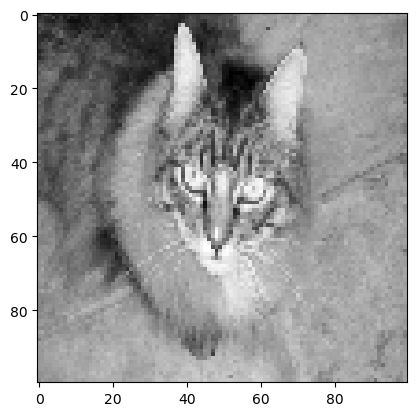

In [12]:

prediction = model.predict(xtest)
accuracy= model.score(xtest,ytest)
categories= ['cats', 'dogs']
print('Accuracy:' , accuracy)
print('Prediction is : ' , categories[prediction[0]])
mypet = np.array(xtest[0]).reshape(100,100)
plt.imshow(mypet , cmap='gray')